In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def predict_clusters(x, u):
    distances = np.sum(np.square(x[:, np.newaxis, :] - u), axis=2)
    cluster_assignments = np.argmin(distances, axis=1)
    return cluster_assignments.reshape(-1, 1)

In [ ]:
def update_means(x, c):
    means = np.zeros((2, x.shape[1]))
    for i in range(2):
        means[i, :] = np.mean(x[c[:, 0] == i], axis=0)
    return means

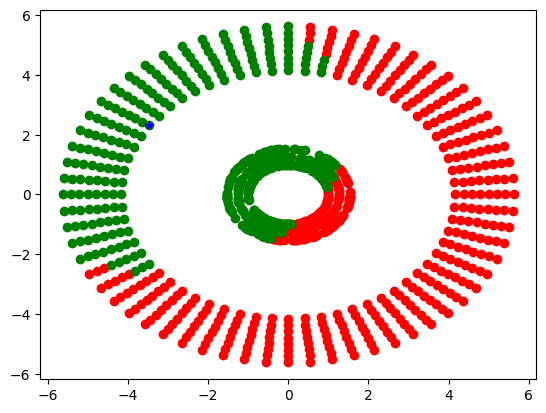

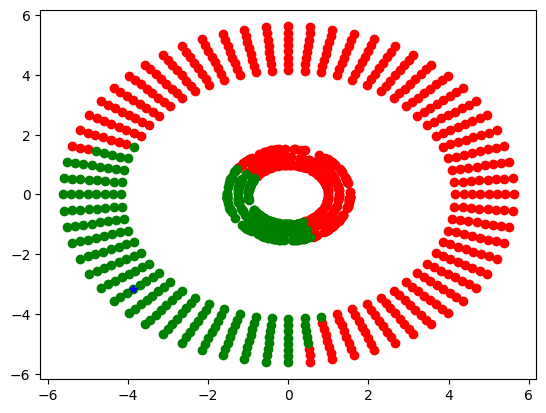

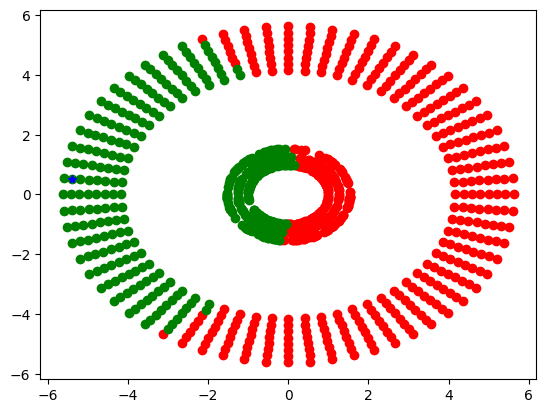

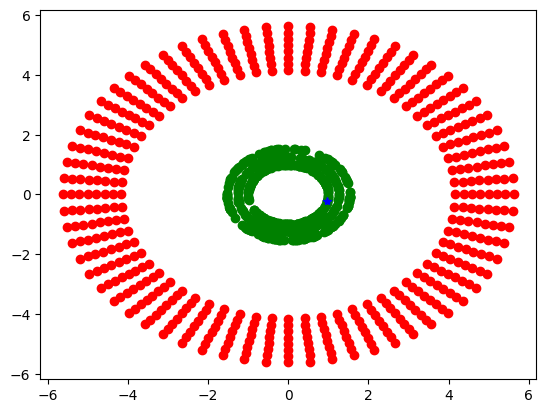

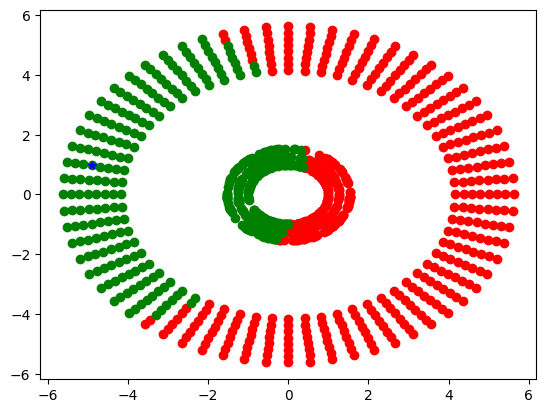

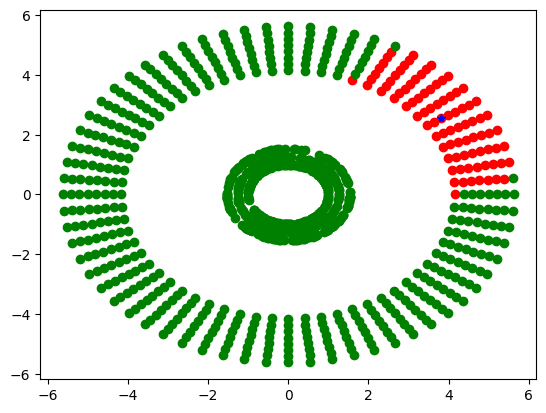

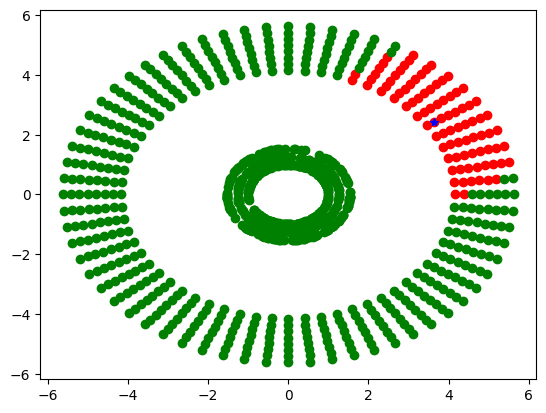

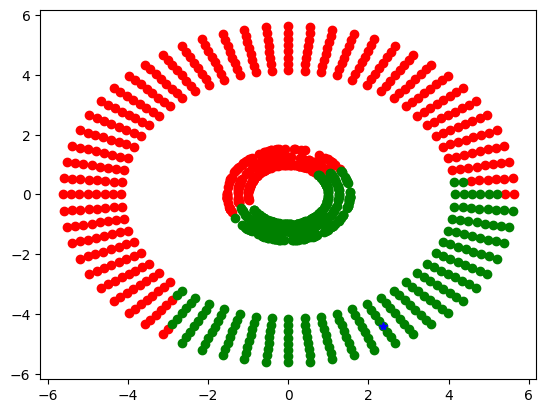

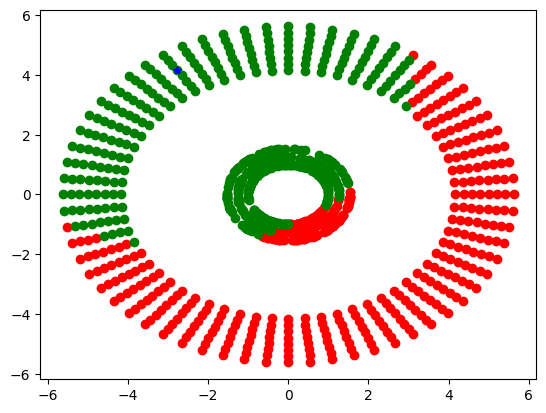

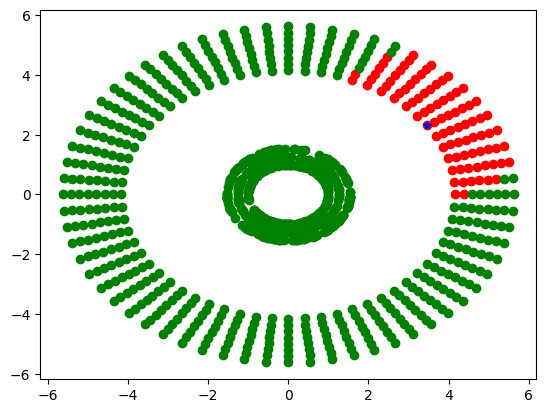

In [ ]:
x_data = np.genfromtxt('/content/drive/MyDrive/data (2)/data/kmeans_data.txt')

for iteration in range(10):
    # Choose a random data point as a landmark
    random_index = np.random.randint(x_data.shape[0])
    landmark_features = np.exp(-0.1 * np.sum(np.square(x_data - x_data[random_index, :].reshape((1, -1))), axis=1)).reshape(-1, 1)

    # Initialize centroids using the first two landmarks
    centroids = landmark_features[:2, :]

    # Assign data points to clusters
    cluster_assignments = predict_clusters(landmark_features, centroids)

    # Update centroids based on mean of each cluster
    centroids = update_means(landmark_features, cluster_assignments)

    # Separate points in each cluster for plotting
    positive_cluster = (cluster_assignments == 1).reshape(cluster_assignments.shape[0])
    negative_cluster = (cluster_assignments == 0).reshape(cluster_assignments.shape[0])

    # Plot the clusters and the landmark
    plt.figure(iteration)
    plt.scatter(x_data[positive_cluster, 0], x_data[positive_cluster, 1], c='r')
    plt.scatter(x_data[negative_cluster, 0], x_data[negative_cluster, 1], c='g')
    plt.plot(x_data[random_index, 0], x_data[random_index, 1], 'b*')

plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')